In [9]:
# Question One
# Daily energy intake in kJ was measured for 11 women (Altman, 1991): 5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770.
# We wish to investigate whether the women’s energy intake deviates systematically from a recommended value of 7725 kJ. Assuming this
# data comes from a normal distribution; use a t-test to test whether the distribution might have a mean of 7725 kJ. 
# Explain whether a left-tail, right-tail or two-tailed test is appropriate. Give the sample mean, sample standard deviation, 
# standard error of the mean (SEM), t statistic, degrees of freedom and p-value. Finally explain if the null hypothesis is rejected or not.

#***************************************Solution******************************************#
import numpy as np
from scipy import stats

#...........................Declaring an array of measured Kjs for 11 women....................................#
daily_intake = [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770]

#...........................Given population....................................#
population = 7725

#...........................Calculating the sample mean....................................#
kj_mean = np.mean(daily_intake)

#...........................Calculating the sample standard deviation....................................#
kj_std = np.std(daily_intake)

#...........................Calculating the error of the mean (SEM)....................................#
kj_sem = kj_std/ np.sqrt(np.size(daily_intake))

#...........................Calculating t-statistics, p_value....................................#
t_statistic, p_value = stats.ttest_1samp(daily_intake, population)

#...........................Calculating the degrees of freedom....................................#
n = len(daily_intake)
deg_freedom = n - 1
#...........................Displaying the results....................................#
results = {
    "Sample Mean": kj_mean,
    "Sample Standard Deviation": kj_std,
    "Standard Error of the Mean": kj_sem,
    "T statistics": t_statistic,
    "Degrees of Freedom": deg_freedom,
    "P-value": p_value
}
for key, value in results.items():
    print(f"{key}: {value}")

 







Sample Mean: 6753.636363636364
Sample Standard Deviation: 1088.9717646166182
Standard Error of the Mean: 328.3373409567765
T statistics: -2.8207540608310193
Degrees of Freedom: 10
P-value: 0.018137235176105805


In [10]:
# Question Two
# A Guinness Overall Enjoyment Score (GOES) was used to test if Guinness served in an Irish pub tastes significantly better than pints
# served elsewhere around the globe. Pints consumed in Ireland received a mean GOES score of 74, while the average GOES score for Guinness
# tasted elsewhere was 57. The full results were as follows: Location Sample Size Mean Standard Deviation Ireland 42 74 7.4
# Elsewhere 61 57 7.1 Is this difference of 74 versus 57 significant, or is it simply due to natural, random variation? Use a t-test and 
# explain whether a one-sample, two-sample or paired test is appropriate. Show the steps of calculating the t statistic and explain whether 
# a left-tailed, right-tailed or two-tailed test is required. Give the resulting p-value.

#***************************************Solution******************************************#
import numpy as np
from scipy import stats

#...........................Ireland given data....................................#
ireland_mean = 74
ireland_std = 7.4
ireland_n = 42


#...........................Elsewhere given data....................................#
elsewhere_mean = 57
elsewhere_std = 7.1
elsewhere_n = 61

#...........................Calculating the degrees of freedom....................................#
degrees_of_freedom = ireland_n + elsewhere_n - 2

#...........................Calculating the t-statistic and p-value....................................#
t_statistic, p_value = stats.ttest_ind_from_stats(
    ireland_mean, ireland_mean, ireland_n,
    elsewhere_mean, elsewhere_std, elsewhere_n
)

#...........................Displaying the results....................................#
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


Degrees of Freedom: 101
T-statistic: 1.7862864717279763
P-value: 0.0770534810556432


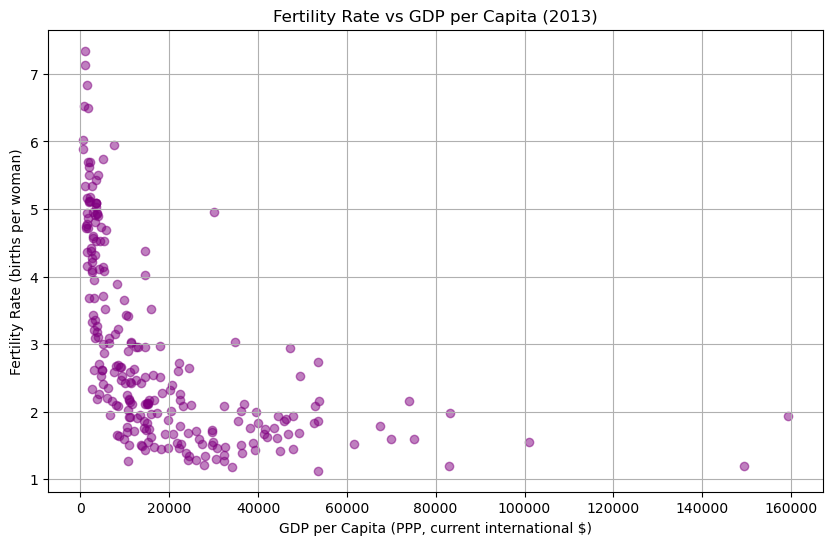

Correlation Coefficient: -0.52


In [11]:
# Question Three
# Use data from the World Bank Indicators for 2013 to study the relationship between Fertility rate, total (births per woman) versus GDP
# per capita PPP (current international $). Make a carefully labelled graph with one dot per country. Estimate the correlation coefficient and
# give your interpretation.

#***************************************Solution******************************************#
import pandas as pd
import matplotlib.pyplot as plt

#...........................Reading the data....................................#

fertility_df = pd.read_excel('fertility.xls', sheet_name='Data', skiprows=3)
gdp_df = pd.read_excel('gdp.xls', sheet_name='Data', skiprows=3)

#...........................Data cleaning....................................#
fertility_2013 = fertility_df[['Country Name', '2013']].rename(columns={'2013': 'Fertility rate'})
gdp_2013 = gdp_df[['Country Name', '2013']].rename(columns={'2013': 'GDP per capita PPP'})

#...........................Merging dataset....................................#
merged_df = pd.merge(fertility_2013, gdp_2013, on='Country Name')

#...........................Removing rows with missing data....................................#
merged_df.dropna(inplace=True)

#...........................Plotting Fertility rate versus GDP per capita PPP....................................#
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['GDP per capita PPP'], merged_df['Fertility rate'], color='purple', alpha=0.5)
plt.xlabel('GDP per Capita (PPP, current international $)')
plt.ylabel('Fertility Rate (births per woman)')
plt.title('Fertility Rate vs GDP per Capita (2013)')
plt.grid(True)
plt.show()
#...........................Calculating correlation coefficient....................................#
correlation = merged_df['GDP per capita PPP'].corr(merged_df['Fertility rate'])
print(f"Correlation Coefficient: {correlation:.2f}")



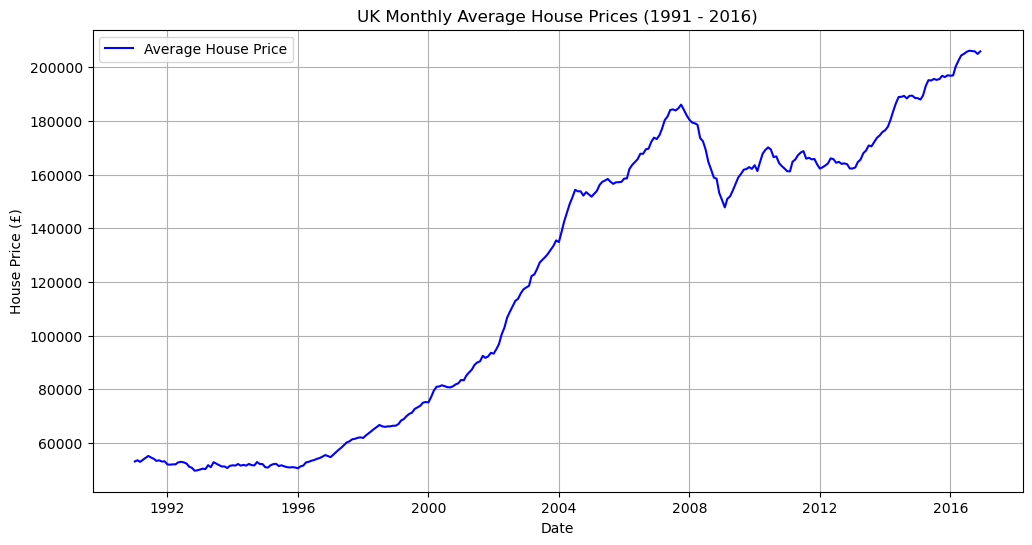

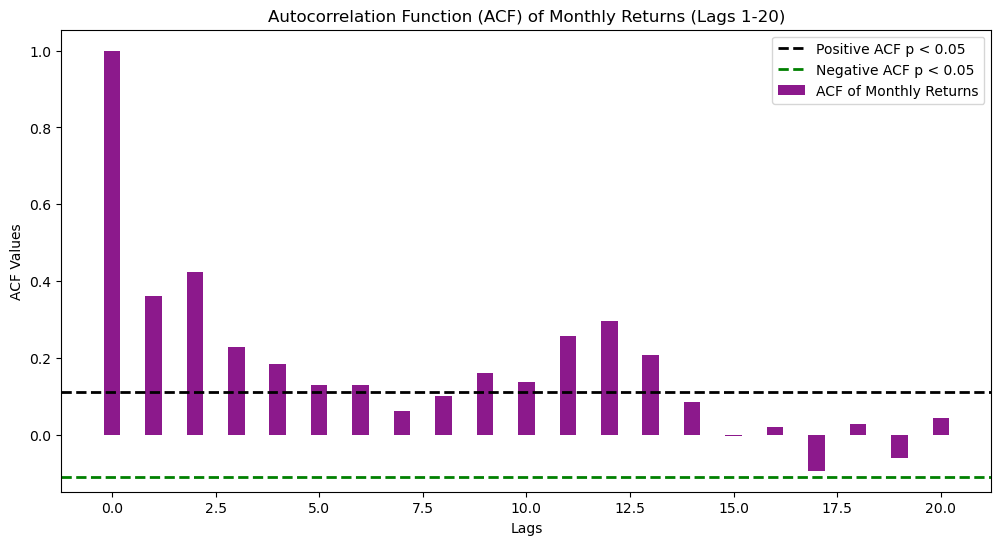

Annualized Return: 5.364826901710451%


In [54]:
# Question Four 
# Load in monthly average house price data in pounds sterling (£) from Jan 1991 to Dec 2016. Download the data from canvas. 
# (choose the file UK monthly indices (Post ‘91)). Graph the time series and label it carefully. Construct the autocorrelation 
# function (ACF) of the monthly returns defined as r(t) = [p(t)/p(t-1)]-1 and show the values for lags of one up to 20 using a bar graph. 
# Indicate the values of the ACF using horizontal lines that would correspond to a statistically significant result
# at p<0.05. From the ACF of monthly data is there evidence of seasonality? Is there a trend in the time series? What is the annualized
# return over this period as a percentage?

#***************************************Solution******************************************#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm


#...........................Reading the data....................................#
house_prices = pd.read_excel('MonthlyAverageHousePrice.xls')

#...........................Renaming the first column....................................#
house_prices.columns.values[0] = 'Date'
house_prices['Date'] = house_prices['Date'].apply(pd.to_datetime)

#...........................Filtering data according to dates....................................#
house_prices = house_prices.query("'1991-01-01' <= Date <= '2016-12-31'")

#...........................Plotting the time series of average house prices....................................#
plt.figure(figsize=(12, 6))
plt.plot(house_prices['Date'], house_prices['Average House Price'], label='Average House Price', color='blue')
plt.title('UK Monthly Average House Prices (1991 - 2016)')
plt.xlabel('Date')
plt.ylabel('House Price (£)')
plt.grid(True)
plt.legend()
plt.show()

#...........................Calculating the monthly returns....................................#
house_prices = house_prices.query("'1991-01-01' <= Date <= '2016-12-31'").copy()

house_prices['Monthly_Return'] = (house_prices['Average House Price'] / house_prices['Average House Price'].shift(1)) - 1


#...........................Plotting the ACF of the monthly returns....................................#

acf_vals, conf_int = sm.tsa.acf(house_prices['Monthly_Return'].dropna(), nlags=20, alpha=0.05)

plt.figure(figsize=(12, 6))
plt.bar(range(21), acf_vals, color='purple', alpha=0.9, width=0.4, label='ACF of Monthly Returns')
plt.title('Autocorrelation Function (ACF) of Monthly Returns (Lags 1-20)')
plt.xlabel('Lags')
plt.ylabel('ACF Values')
critical_value = norm.ppf(1 - 0.05 / 2) / (len(house_prices['Monthly_Return'])**0.5)
plt.axhline(y=critical_value, color='black', linestyle='--', linewidth=2, label='Positive ACF p < 0.05')
plt.axhline(y=-critical_value, color='green', linestyle='--', linewidth=2, label='Negative ACF p < 0.05')
plt.legend()
plt.show()


# #...........................Calculating the annualized return....................................#
annualized_return = (house_prices['Average House Price'].iloc[-1] / house_prices['Average House Price'].iloc[0]) ** (1 / 25.95) - 1

print(f"Annualized Return: {annualized_return * 100}%")




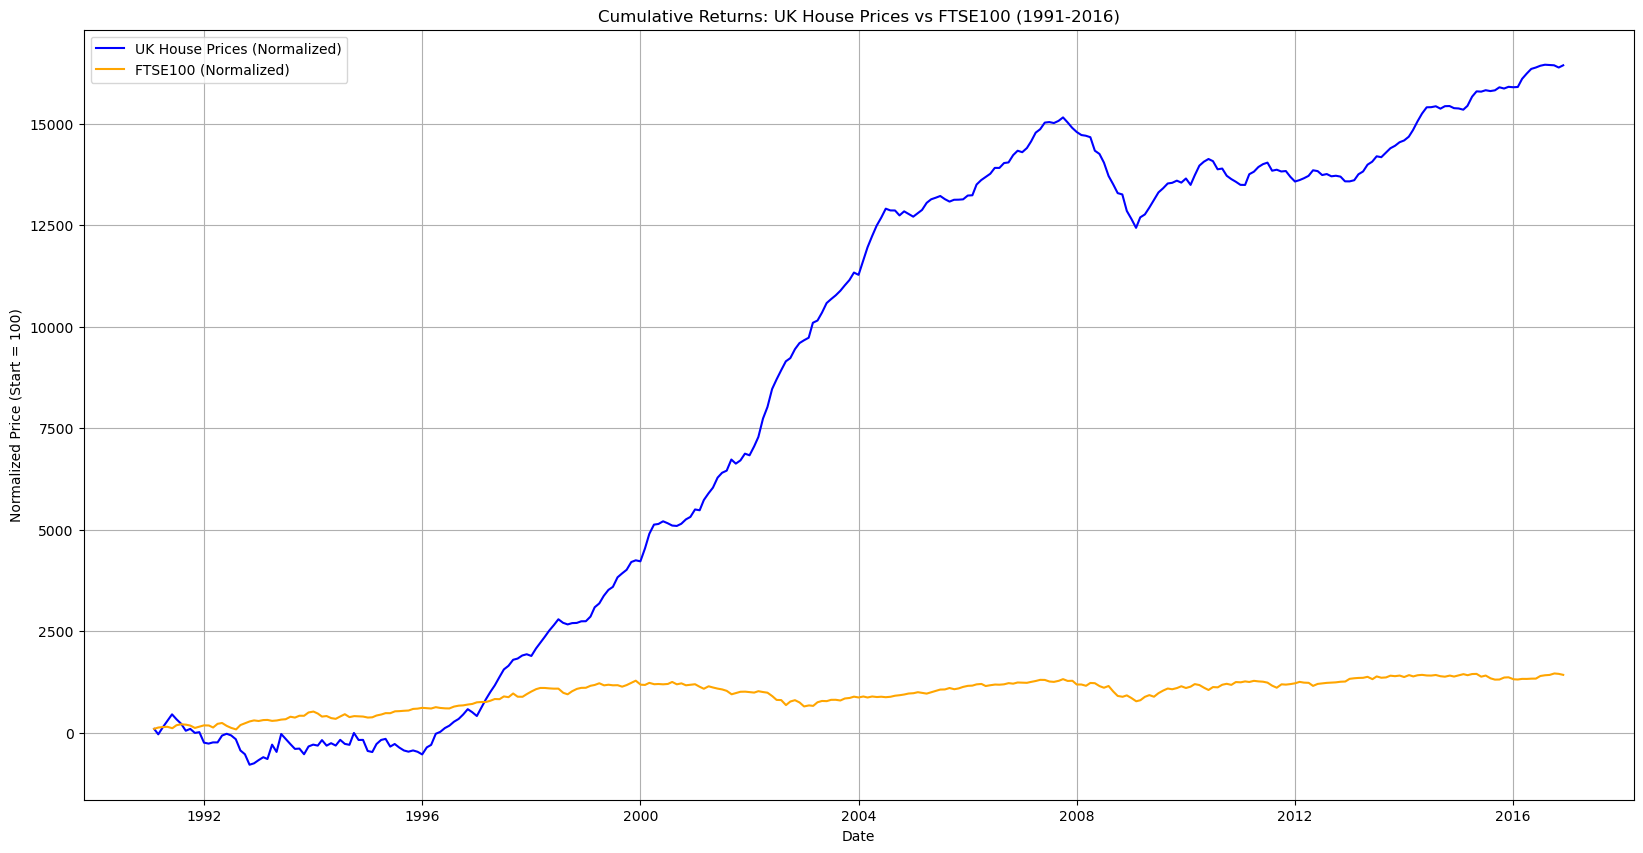

FTSE100 Annualized Return: 5.31%


In [41]:
# Question Five
# Load in the FTSE100 index from canvas (ticker = ^FTSE) over the same period (01-Jan-1991 to 31-Dec-2016). Plot the cumulative returns
# from the House market (using the price data from question 4) and the FTSE100 index on the same graph with the time series 
# normalized such that each starts at 100 in Jan-1991. What is the average annualized return from the FTSE100? 
# Would it have been better to invest in a UK house or the UK stock market over this period

#***************************************Solution******************************************#

import pandas as pd
import matplotlib.pyplot as plt

#...........................Reading the dataset....................................#
ftse_data = pd.read_csv('FTSE100.csv')  
ftse_data['Date'] = pd.to_datetime(ftse_data['Date'])
ftse_data = ftse_data.sort_values(by='Date')

#...........................Calculating the normalized returns for FTSE100....................................#
ftse_data['Monthly_Return'] = ftse_data["Adj Close"].pct_change()
ftse_data = ftse_data.dropna()
ftse_data['Cumulative_Returns'] = ftse_data['Monthly_Return'].cumsum()

ftse_data['Normalized'] = (ftse_data['Cumulative_Returns'] / ftse_data['Cumulative_Returns'].iloc[0]) * 100


#...........................Data cleaning....................................#

house_data = house_prices.sort_values(by='Date')
house_data = house_data[house_data[['Monthly_Return']].notna().all(axis=1)]
house_data['Cumulative_Returns'] = house_data['Monthly_Return'].cumsum()
initial_cumulative = house_data['Cumulative_Returns'].iloc[0]
house_data['Normalized'] = (house_data['Cumulative_Returns'] / initial_cumulative) * 100


#...........................Plotting the normalized time series....................................#
plt.figure(figsize=(20, 10))
plt.plot(house_data['Date'], house_data["Normalized"], label='UK House Prices (Normalized)', color='blue')
plt.plot(ftse_data['Date'], ftse_data['Normalized'] , label='FTSE100 (Normalized)', color='orange')
plt.title('Cumulative Returns: UK House Prices vs FTSE100 (1991-2016)')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Start = 100)')
plt.legend()
plt.grid(True)
plt.show()


# #...........................Calculating the average annualized return for FTSE100....................................#
years = 2016 - 1991 + 1 
ftse_cumulative_return = (ftse_filtered['Close'].iloc[-1] / ftse_filtered['Close'].iloc[0])
ftse_annualized_return = (1 + ftse_cumulative_return) ** (1 / years) - 1

print(f"FTSE100 Annualized Return: {ftse_annualized_return * 100:.2f}%")


